##승수형 레버리지 옵션(Leverage Options with Multiplier)
승수형 레버리지 옵션(Leverage Options with Multiplier)은 기초 자산의 가격 변화에 대해 더 큰 변화를 갖도록 설계된 옵션입니다. 승수형 옵션은 기초 자산의 가격 변동을 몇 배로 확대하여 옵션의 가격을 결정합니다.

In [3]:
import matplotlib.font_manager as fm

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

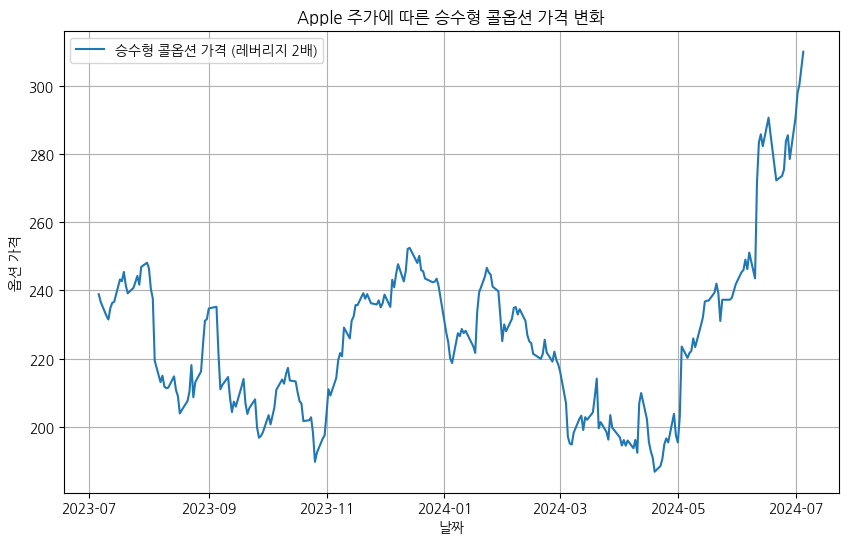

In [4]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
import matplotlib.pyplot as plt

# 블랙-숄즈 모델을 활용한 콜옵션 가격 계산 함수
def call_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# 승수형 옵션의 가격 계산 함수
def leverage_option_price(S, K, T, r, sigma, multiplier):
    """
    S: 기초 자산의 현재 가격
    K: 옵션 행사가격
    T: 옵션의 만기 시간
    r: 무위험 이자율
    sigma: 기초 자산의 변동성
    multiplier: 레버리지 승수
    """
    # 레버리지 승수를 적용한 기초 자산의 가격
    leveraged_S = S * multiplier

    # 블랙-숄즈 모델을 사용하여 승수형 콜옵션의 가격 계산
    leveraged_call_price = call_option_price(leveraged_S, K, T, r, sigma)

    return leveraged_call_price

# 실제 데이터 가져오기
# Apple Inc. 주가 데이터
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1y")
S_values = apple_data['Close'].values

# 기본 변수 설정
K = 150   # 옵션의 행사가격
T = 1     # 옵션의 만기 기간 (1년)
r = 0.05  # 무위험 이자율 (5%)
sigma = np.std(np.log(apple_data['Close'] / apple_data['Close'].shift(1)).dropna()) * np.sqrt(252)  # 기초 자산의 변동성
multiplier = 2  # 레버리지 승수

# 승수형 옵션 가격 계산
leverage_call_prices = [leverage_option_price(S, K, T, r, sigma, multiplier) for S in S_values]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(apple_data.index, leverage_call_prices, label='승수형 콜옵션 가격 (레버리지 2배)')
plt.xlabel('날짜')
plt.ylabel('옵션 가격')
plt.title('Apple 주가에 따른 승수형 콜옵션 가격 변화')
plt.legend()
plt.grid(True)
plt.show()
